<a href="https://colab.research.google.com/github/nitishm08/Predicting-Cancer-Patients/blob/master/Predicting_Cancer_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%cd /content/drive/My Drive/Python for Data Science/TensorFlow_FILES

/content/drive/My Drive/Python for Data Science/TensorFlow_FILES


In [ ]:
df= pd.read_csv('DATA/cancer_classification.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


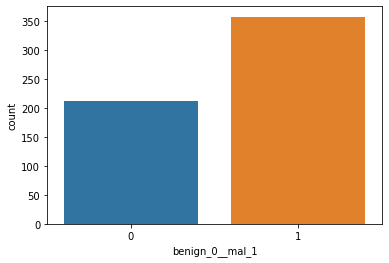

In [ ]:
sns.countplot('benign_0__mal_1',data=df)

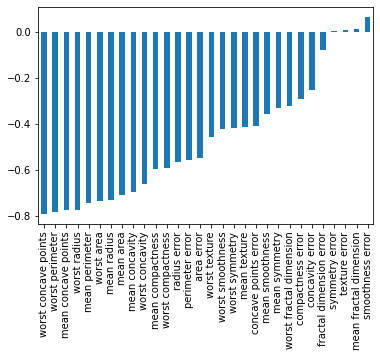

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values(ascending=True).plot(kind='bar')

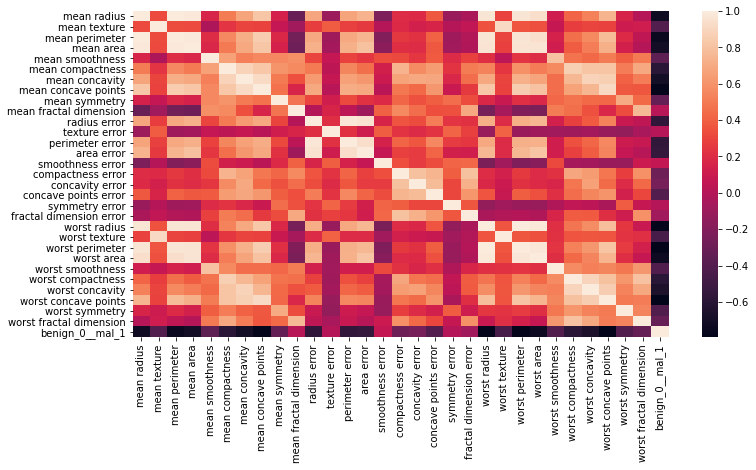

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

In [ ]:
X=df.drop('benign_0__mal_1',axis=1).values

In [ ]:
y=df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model=Sequential()

model.add(Dense(30,'relu'))
model.add(Dense(15,'relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6789 - val_loss: 0.6562
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6422 - val_loss: 0.6223
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6073 - val_loss: 0.5854
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5673 - val_loss: 0.5447
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5273 - val_loss: 0.4995
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4830 - val_loss: 0.4506
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4377 - val_loss: 0.3999
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3903 - val_loss: 0.3583
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3510 - val_loss: 0.3171
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3171 - val_loss: 0.2873
Epoch 11

In [ ]:
loss=pd.DataFrame(model.history.history)

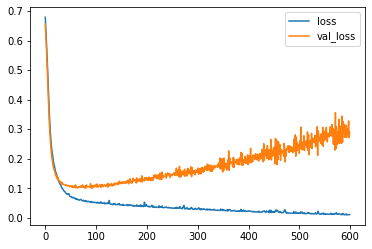

In [ ]:
loss.plot()

In [ ]:
model=Sequential()

model.add(Dense(30,'relu'))
model.add(Dense(15,'relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7157 - val_loss: 0.6915
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6734 - val_loss: 0.6606
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6439 - val_loss: 0.6285
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6052 - val_loss: 0.5914
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5650 - val_loss: 0.5468
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5190 - val_loss: 0.4970
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4702 - val_loss: 0.4470
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4243 - val_loss: 0.3988
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3768 - val_loss: 0.3524
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3323 - val_loss: 0.3065
Epoch 11/

In [ ]:
model_loss=pd.DataFrame(model.history.history)

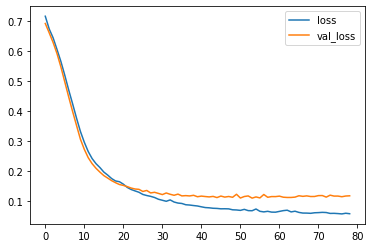

In [ ]:
model_loss.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model=Sequential()

model.add(Dense(30,'relu'))
model.add(Dropout(0.5))

model.add(Dense(15,'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7056 - val_loss: 0.6907
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6964 - val_loss: 0.6789
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6761 - val_loss: 0.6666
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6502 - val_loss: 0.6481
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6394 - val_loss: 0.6238
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6187 - val_loss: 0.5961
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5996 - val_loss: 0.5648
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5761 - val_loss: 0.5339
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5420 - val_loss: 0.5029
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5272 - val_loss: 0.4735
Epoch 11/

In [ ]:
model_loss=pd.DataFrame(model.history.history)

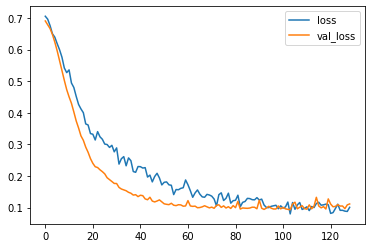

In [ ]:
model_loss.plot()

In [ ]:
#little diff for classification
predictions=model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

[[54  1]
 [ 4 84]]
